In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_data = gen_train.flow_from_directory("./waste2.0/Dataset/train",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 14165 images belonging to 2 classes.


In [6]:
train_data.class_indices

{'biodegradable': 0, 'non_biodegradable': 1}

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)


In [5]:
train_data_res = gen_train.flow_from_directory("./waste2.0/Dataset/train",
                                           target_size = (299, 299), batch_size = 32, class_mode="categorical")

Found 14165 images belonging to 2 classes.


In [16]:

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [7]:
test_data = gen_train.flow_from_directory("./waste2.0/Dataset/val",
                                           target_size = (299, 299), batch_size = 32, class_mode="categorical")

Found 1201 images belonging to 2 classes.


In [8]:
test_data.class_indices

{'biodegradable': 0, 'non_biodegradable': 1}

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model without the top layers
res50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [11]:
from tensorflow.keras.applications import InceptionV3

In [12]:
incev3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [13]:
incev3

<Functional name=inception_v3, built=True>

In [14]:
res50

<Functional name=resnet50, built=True>

In [17]:
vgg16

<Functional name=vgg16, built=True>

In [18]:

for layer in vgg16.layers:
  layer.trainable = False

for layer in res50.layers:
  layer.trainable = False

for layer in incev3.layers:
  layer.trainable = False

In [14]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)
y=layers.Flatten()(res50.output)
z=layers.Flatten()(incev3.output)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model



In [12]:
#for (i,layer) in enumerate(vgg.layers):
   # print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
def lw(bottom_model, num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(num_classes,activation='softmax')(top_model)
        return top_model 

In [17]:
num_classes = 2
FC_Head = lw(vgg16, num_classes)

model = Model(inputs = vgg16.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [15]:

prediction1 = layers.Dense(units = 2, activation="softmax")(x)
prediction2 = layers.Dense(units = 2, activation="softmax")(y)
prediction3 = layers.Dense(units = 2, activation="softmax")(z)

# creating a model object

model1 = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction1)
model1.summary()

model2 = tf.keras.models.Model(inputs = res50.input, outputs=prediction2)
model2.summary()
model3 = tf.keras.models.Model(inputs =incev3.input, outputs=prediction3)
model3.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 22,064,930 (84.17 MB)

 Trainable params: 262,146 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:

model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy","Precision", "Recall"])

result1 = model1.fit(train_data, epochs = 10, steps_per_epoch=len(train_data))

Epoch 1/10


C:\Users\trish\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 42/443 ━━━━━━━━━━━━━━━━━━━━ 2:19:17 21s/step - Precision: 0.8201 - Recall: 0.8201 - accuracy: 0.8201 - loss: 0.7889

C:\Users\trish\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


443/443 ━━━━━━━━━━━━━━━━━━━━ 5230s 12s/step - Precision: 0.8971 - Recall: 0.8971 - accuracy: 0.8971 - loss: 0.3462
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\trish\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


443/443 ━━━━━━━━━━━━━━━━━━━━ 4071s 9s/step - Precision: 0.9261 - Recall: 0.9261 - accuracy: 0.9261 - loss: 0.2099
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 83232s 188s/step - Precision: 0.9439 - Recall: 0.9439 - accuracy: 0.9439 - loss: 0.1523
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 3728s 8s/step - Precision: 0.9359 - Recall: 0.9359 - accuracy: 0.9359 - loss: 0.1710
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 5173s 12s/step - Precision: 0.9463 - Recall: 0.9463 - accuracy: 0.9463 - loss: 0.1369
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - Precision: 0.0000e+00 - Rec

In [34]:

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy","Precision", "Recall"])

resul2t = model2.fit(train_data, epochs = 5, steps_per_epoch=len(train_data))

Epoch 1/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 1522s 3s/step - Precision: 0.8557 - Recall: 0.8557 - accuracy: 0.8557 - loss: 1.5514
Epoch 2/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 1851s 4s/step - Precision: 0.8766 - Recall: 0.8766 - accuracy: 0.8766 - loss: 0.4386
Epoch 4/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 1112s 2s/step - Precision: 0.8703 - Recall: 0.8703 - accuracy: 0.8703 - loss: 0.4731


In [ ]:

##model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy","Precision", "Recall"])
##result3 = model3.fit(train_data, epochs = 5, validation_data=(test_data),steps_per_epoch=len(train_data))

In [36]:
from tensorflow.keras.preprocessing import image
output_class = ["non_biodegradable","biodegradable"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model2.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)
  print("predicted_accuracy",predicted_accuracy)
  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

In [23]:
model1

<Functional name=functional_1, built=True>

In [24]:
result1

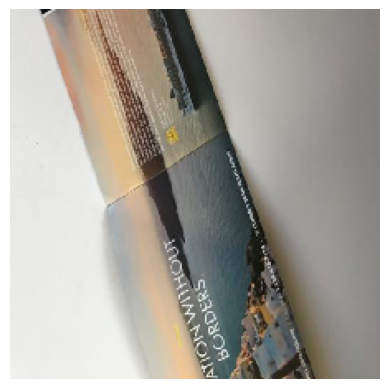

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted_accuracy 100.0
Your waste material is  biodegradable  with  100.0  % accuracy


In [37]:
waste_prediction("./project/waste/paper/paper102.jpg")

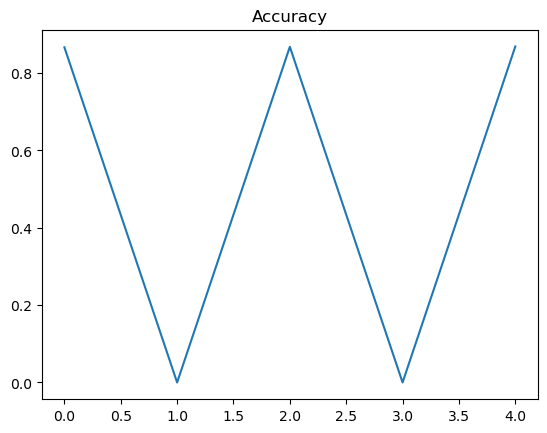

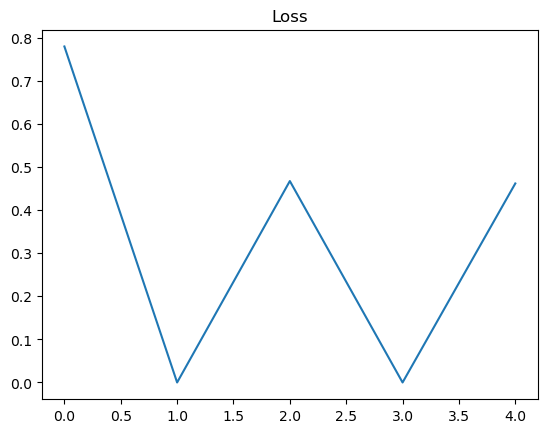

In [40]:
plt.title("Accuracy")
plt.plot(resul2t.history["accuracy"])
plt.show()
plt.title("Loss")
plt.plot(resul2t.history["loss"])
plt.show()

In [27]:
import pickle
saved_model = pickle.dumps(model1) 

In [28]:
load_model1=pickle.loads(saved_model) 

In [42]:
predictions=load_model1.predict(test_data)

38/38 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step


In [26]:
train_data = gen_train.flow_from_directory("./waste2.0/Dataset/train",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical",shuffle=True)

Found 14165 images belonging to 2 classes.


In [31]:

# Debugging data loader
for i, (images, labels) in enumerate(train_data):
    print(f"Batch {i}: images.shape = {images.shape}, labels.shape = {labels.shape}")
    if i > 5:  # Print first few batches
        break


Batch 0: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)
Batch 1: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)
Batch 2: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)
Batch 3: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)
Batch 4: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)
Batch 5: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)
Batch 6: images.shape = (32, 224, 224, 3), labels.shape = (32, 2)


In [43]:
predicted_classes = np.argmax(predictions, axis=1) 
predicted_classes

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
true_classes = test_data.classes

In [45]:
true_classes

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(train_data,
                    epochs=5, 
                    validation_data=(test_data),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 3208s 7s/step - accuracy: 0.9310 - loss: 0.1832 - val_accuracy: 0.8468 - val_loss: 0.3412
Epoch 2/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 39008s 88s/step - accuracy: 0.9365 - loss: 0.1598 - val_accuracy: 0.8493 - val_loss: 0.3311
Epoch 3/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 4784s 11s/step - accuracy: 0.9378 - loss: 0.1644 - val_accuracy: 0.8201 - val_loss: 0.4284
Epoch 4/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 29139s 66s/step - accuracy: 0.9335 - loss: 0.1657 - val_accuracy: 0.8426 - val_loss: 0.3822
Epoch 5/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 4010s 9s/step - accuracy: 0.9391 - loss: 0.1543 - val_accuracy: 0.8568 - val_loss: 0.3207


In [28]:
train_data

In [29]:
train_data = gen_train.flow_from_directory("./waste2.0/Dataset/train",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical",shuffle=True)

Found 14165 images belonging to 2 classes.


In [30]:
test_data = gen_train.flow_from_directory("./waste2.0/Dataset/val",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 1201 images belonging to 2 classes.


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
epochs = range(len(acc))
epochs

range(0, 5)

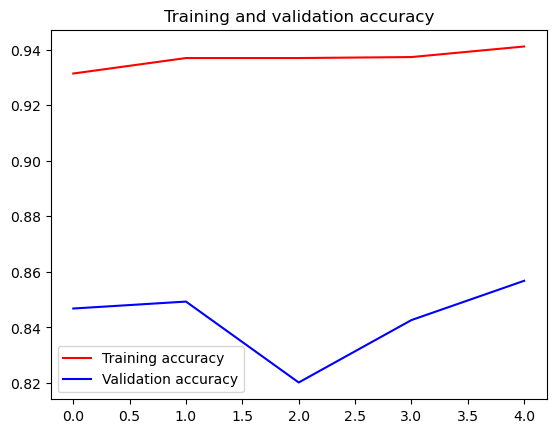

<Figure size 640x480 with 0 Axes>

In [34]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [35]:
import pickle

# Assuming 'model' is your trained machine learning model
with open('model.pkl', 'wb') as f:
    pickle.dump(history, f)


In [36]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

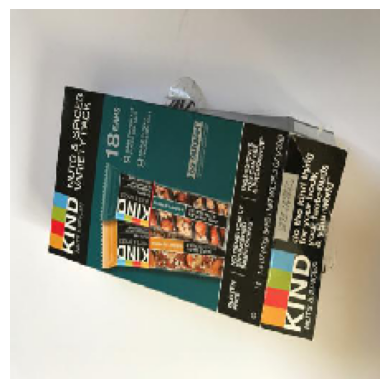

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
predicted_accuracy 68.22
Your waste material is  biodegradable  with  68.22  % accuracy


In [45]:
waste_prediction("./project/waste/paper/paper106.jpg")

In [50]:
from tensorflow.keras.preprocessing import image
output_class = ["biodegradable","non-biodegradable"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)
  print("predicted_accuracy",predicted_accuracy)
  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

In [41]:
predictions = model.predict(test_data)

38/38 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step


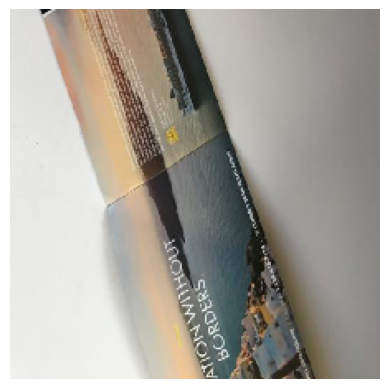

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
predicted_accuracy 99.64
Your waste material is  biodegradable  with  99.64  % accuracy


In [52]:
waste_prediction("./project/waste/paper/paper102.jpg")

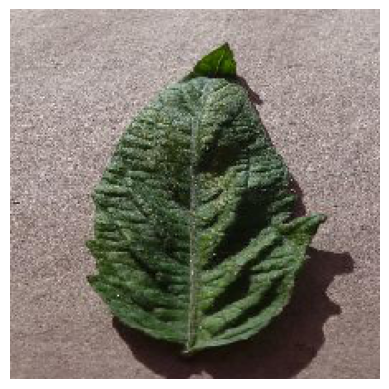

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
predicted_accuracy 99.86
Your waste material is  biodegradable  with  99.86  % accuracy


In [51]:
waste_prediction("./waste2.0/Dataset/train/biodegradable/leaf_waste/p1.jpg")